In [1]:
import wandb

import pandas as pd
import numpy as np
import statsmodels
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import norm
from scipy.special import boxcox1p



import matplotlib.pyplot as plt
import seaborn as sns


from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [2]:
run = wandb.init(project="nyc_airbnb", group="eda", save_code=True)

wandb: Currently logged in as: laerciop. Use `wandb login --relogin` to force relogin


In [3]:
local_path = wandb.use_artifact("sample.csv:latest").file()
df = pd.read_csv(local_path)

In [4]:
profile = ProfileReport(df)

In [5]:
#Using profile.to_notebook_iframe() instead of profile.to_widgets()
#due a problem with the library and the conda environment


profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Handling missing values

Columns regards to room identification and reviews have some missing values. We will use different strategies to deal with then to improve our model performance

In [6]:
#Converting date colum to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

#filling with the earliest review value
df['last_review'] = df['last_review'].fillna(df['last_review'].min())

In [7]:
#filling values for reviews per month
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [8]:
#drop lastly the values of the str columns
df = df.dropna(subset=['name', 'host_name'])

### Target variable analysis

As we can visualize in the Pandas Profile run we have a highly skewed distribution, so we can test a log trasnformation to see if the model improves

<AxesSubplot:xlabel='price', ylabel='Density'>

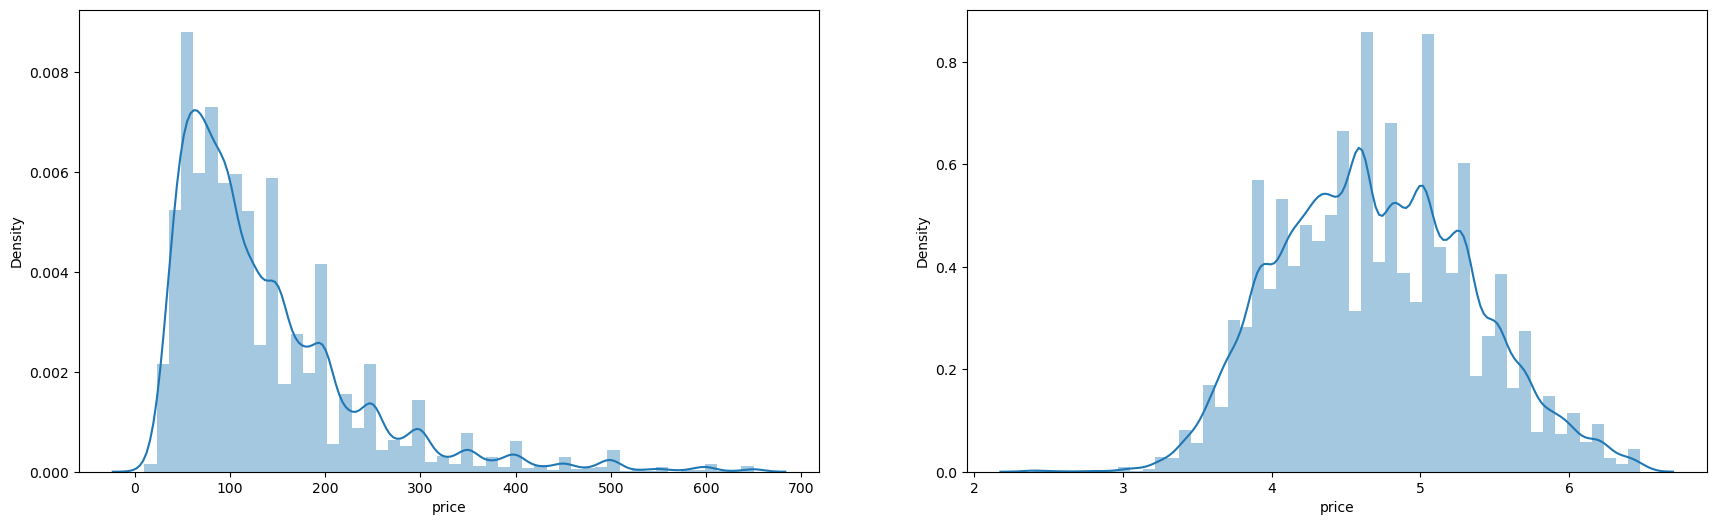

In [9]:
# Comparing actual distribuition vs. ln(price + 1) with np.log1p
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(21,6))

#should tested n times to see how skewness changes to new data input
mod_price = df['price'][df['price'].between(10,650)]

sns.distplot(mod_price, ax=axes[0])
sns.distplot(np.log1p(mod_price), ax=axes[1])

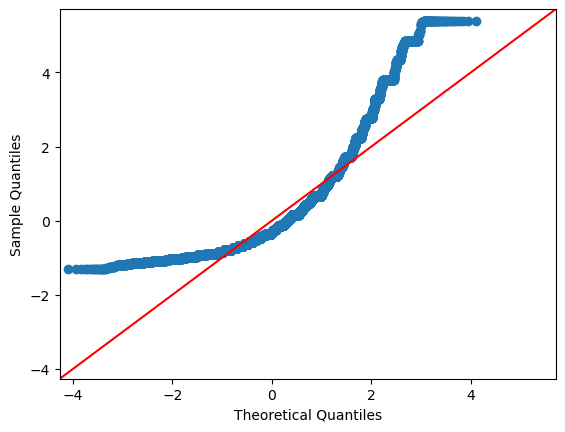

In [10]:
# Visualize norm deviation - original sample data
sm.qqplot(mod_price, stats.norm, fit=True, line='45');

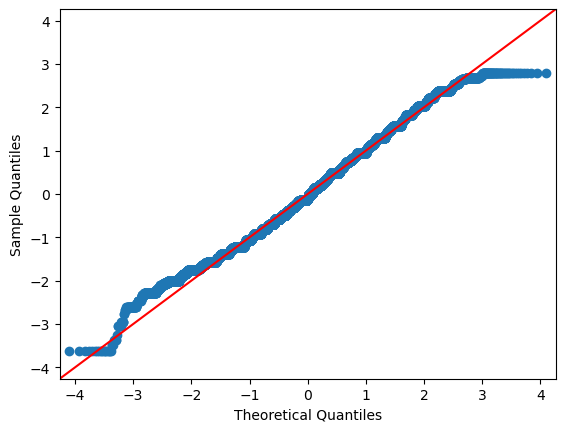

In [11]:
# Visualize norm deviation - Log1p
sm.qqplot(np.log1p(mod_price), stats.norm, fit=True, line='45');

In [12]:
# Drop outliers
min_price = 10
max_price = 650
index_mask = df['price'].between(min_price, max_price)

df = df[index_mask].copy()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48147 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48147 non-null  int64         
 1   name                            48147 non-null  object        
 2   host_id                         48147 non-null  int64         
 3   host_name                       48147 non-null  object        
 4   neighbourhood_group             48147 non-null  object        
 5   neighbourhood                   48147 non-null  object        
 6   latitude                        48147 non-null  float64       
 7   longitude                       48147 non-null  float64       
 8   room_type                       48147 non-null  object        
 9   price                           48147 non-null  int64         
 10  minimum_nights                  48147 non-null  int64         
 11  nu

In [14]:
run.finish()